<a id="2"></a>
<h2 style="background-color:light yellow;font-family:monospace;font-size:300%;text-align:center">BANK CREDIT CARD CUSTOMER MARKETING STRATEGY REPORT </h2>

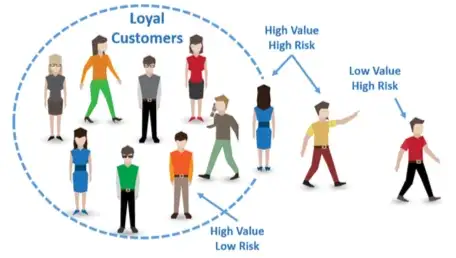
(Original Image from https://www.dunnsolutions.com)

<a id="4"></a>
<h1 style="background-color:orange;font-family:monospace;font-size:250%;text-align:center">TABLE OF CONTENT</h1>


* [Table of Contents](#)
* [1. Executive Summary](#)
* [2. Defining the Task](#)
* [3. Business Understanding](#)
* [4. The Approach](#)
* [5. Data at a Glance](#)
    - [5.1 Load Data](#)
    - [5.2 Feature Description](#)
    - [5.3 Missing Values](#)
    - [5.4 Unique Values](#)
    - [5.5 Target Label](#)
    
* [6. EDA](#)
    - [6.1 Univariate analysis](#)
        - [6.1.1 Numerical Data](#)
        - [6.1.2 Categorical Data](#)
    - [6.2 Multivariate analysis](#)
    
* [7. Data Preprocessing](#)
    - [7.1 Label Encoding](#)
    - [7.2 Normalization](#)
    - [7.3 Data Upsampling Using SMOTE](#)
    
* [xx](#)
* [xx](#)
* [xx](#)
    

* [Conclusion](#Conclusion)

<a id="4"></a>
<h1 style="background-color:orange;font-family:monospace;font-size:250%;text-align:center">1. EXECUTIVE SUMMARY</h1>

### <font color='red'>"Focus on the right message for the right people at the right time."</font>

The manager at our bank was disturbed with more and more customers leaving our credit card services in the past year. As customesr churn rate continues to rise, we aim to improve our Customer Relationship Management (CRM) and the marketing strategy in an attempt to reverse the trend.

This report is an attempt at providing actionable marketing strategies by identifying segments of customers with with high Return of Investment (ROI). It explores data with three prime perspectives-

1. What customers are we losing?
    - Behaviors and insights analysis to characterize churners.
2. Why are we losing them?
    - Machine learning modeling and feature importance analysis to identify key factors contribute to customer churn.
3. How can we stop them from losing?
    - Customer segmentation to locate at risk customers with high ROI for marketing.
    - Providing actionable solutions to Customer management team 

Using the best suited analytical approach, it then throws light on churn prediction with recommendations to curb it and suggests effective marketing strategies for customer base retention and possibly, growth.

The key finding of this report is that customers with lower average balance, lower transactions, and lower product utilization are more likely to churn. We furture xxxxxxxxxxx

<a id="4"></a>
<h1 style="background-color:orange;font-family:monospace;font-size:250%;text-align:center">2. DEFINING THE TASK</h1>

Although it's been over a decade since the 2008 global financial crisis, there are still plenty of lessons to be learned from this particular economic downturn. One important lesson is that many businesses, nce emphasizing heavily on growing new customers, start to realize the importance of keeping existing customers. Studies suggest bagging new customers could be anywhere from 5 to 25 times more cost-incurring than holding on to an existing one, reported a Harvard Business Review. Given the direct impact of that on revenue, wisdom would certainly lie in putting in that effort to retain old customers – which would still be modest – considering the rewarding revenue versus going about getting new customers to maintain the customer base.

Our top priority in this business problem is to identify customers who are getting churned and key factors behind those decisions. Eventually we can provide our Customer relationship management team with high ROI customers at risk, and actionable solutions on marketing strategies.

Even if we predict non-churning customers as churned, it won't harm our business. But predicting churning customers as Non-churning will do. So **recall** (TP/TP+FN) is going to be the model evaluation metric in the study.

<a id="4"></a>
<h1 style="background-color:orange;font-family:monospace;font-size:250%;text-align:center">3. BUSINESS UNDERSTANDING</h1>

https://medium.com/@tabul8tor/how-do-credit-cards-work-a15596e14860

1. Credit card business: Issuer (Banks) vs Network (MC, Visa, AE, Discover)
<div>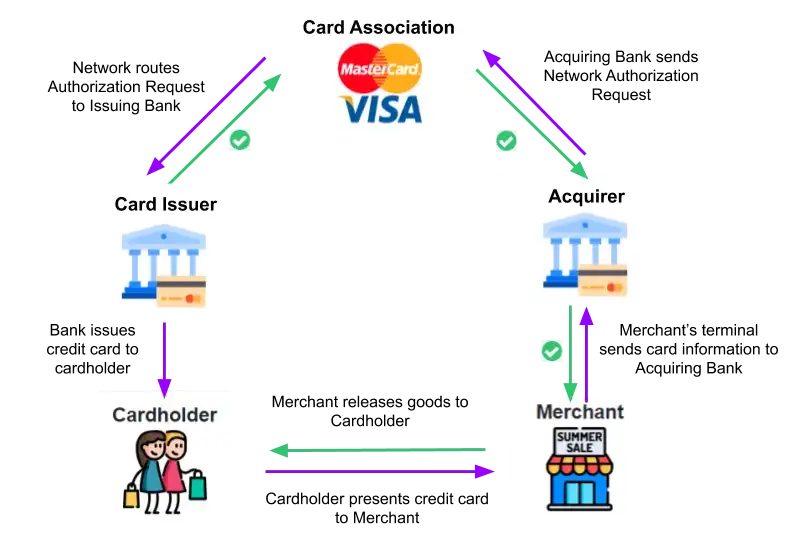</div> 

2. How Do Credit Card Companies Make Money?
- Interest (caldholders)
- Interchange or Merchant fees (Merchants)
- Fees
    - Annual Fees
    - Cash Advance Fees
    - Balance Transfer Fees
    - Late Fees

3. General strategies to grow credit card customers
- Provide Multiple Card Types.
- Offer a Balance Transfer Program. 
- Credit Limit Increases. ...
- Adjust Lending Policies. ...
- Consistently Marketing your Card Program.

<a id="4"></a>
<h1 style="background-color:orange;font-family:monospace;font-size:250%;text-align:center">4. THE APPROACH</h1>

The journey from the problem to insights discovery and solution building is displayed below.

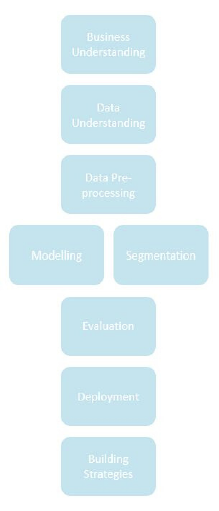

### **Credit Card Customer Segmentation: 
(https://www.linkedin.com/pulse/credit-card-customer-segmentation-jay-shah/)


### **Churn: Tree model

<a id="4"></a>
<h1 style="background-color:orange;font-family:monospace;font-size:250%;text-align:center">5. DATA AT A GLANCE</h1>

The dataset contains information around 23 attributes for an approximate 10,000 customers. These attributes were divided into 6 categorical and 17 numerical features. The target label is binary information on churn

In [270]:
# necessary package
from collections import Counter
from scipy import stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import imblearn

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('tableau-colorblind10')
import seaborn as sns
from plotnine import *
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

## 5.1 Load Data

In [274]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.

In [275]:
n_unique = df.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                         

In [276]:
# column CLIENTNUM contain Uunique identifier for the customer - not useful for model building
# Last two column contains not useful information
# We are going to drop these 3 columns
df = df.drop(columns = ['CLIENTNUM', 
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

## 5.2 Feature Description 

In [ ]:
df.info()

Below is the description of all columns

|Feature|Description|
|----------|:------------------------------------------------------------------------------|
|Attrition_Flag |Label - customer churn info|
|Customer_Age   |Demographic variable - Customer's Age in Years|
|Gender         |Demographic variable - M=Male, F=Female|
|Dependent_count|Demographic variable - Number of dependents|
|Education_Level|Demographic variable - Educational Qualification of the account holder|
|Marital_Status |Demographic variable - Married, Single, Divorced, Unknown|
|Income_Category|Demographic variable - Annual Income Category of the account holder |
|Months_on_book          |Bank relation - Period of relationship with bank|
|Total_Relationship_Count|Bank relation - Total no. of products held by the customer|
|Months_Inactive_12_mon  |Bank relation - No. of months inactive in the last 12 months|
|Contacts_Count_12_mon   |Bank relation - No. of Contacts in the last 12 months|
|Card_Category           |Credit card - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)|
|Credit_Limit            |Credit card - Credit Limit on the Credit Card|
|Total_Revolving_Bal     |Credit card - Total Revolving Balance on the Credit Card|
|Avg_Open_To_Buy         |Credit card - Open to Buy Credit Line (Average of last 12 months)|
|Total_Amt_Chng_Q4_Q1    |Credit card - Change in Transaction Amount (Q4 over Q1)|
|Total_Trans_Amt         |Credit card - Total Transaction Amount (Last 12 months)|
|Total_Trans_Ct          |Credit card - Total Transaction Count (Last 12 months)|
|Total_Ct_Chng_Q4_Q1     |Credit card - Change in Transaction Count (Q4 over Q1)|
|Avg_Utilization_Ratio   |Credit card - Average Card Utilization Ratio|

Features composition: We have a total of 19 features including 14 numerical and 5 categorical attributes

## 5.3 Missing Values

In [277]:
print("No Missing Data in this Dataset",'\n')
print(df.isnull().sum())

No Missing Data in this Dataset 

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


## 5.4 Unique Values

In [278]:
n_unique = df.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64


In [273]:
print("Unique values in each categorical column:", '\n')
for col in df.select_dtypes(include=[object]):
    if(col != 'Attrition_Flag'):
         print(col,":", df[col].unique())

Unique values in each categorical column: 

Gender : ['F' 'M']
Education_Level : ['Uneducated' 'Graduate' 'Doctorate' 'Post-Graduate' 'High School'
 'Unknown' 'College']
Marital_Status : ['Single' 'Married' 'Divorced' 'Unknown']
Income_Category : ['Less than $40K' '$60K - $80K' '$40K - $60K' '$80K - $120K' 'Unknown'
 '$120K +']
Card_Category : ['Blue' 'Silver' 'Platinum' 'Gold']


## 5.5 Target label

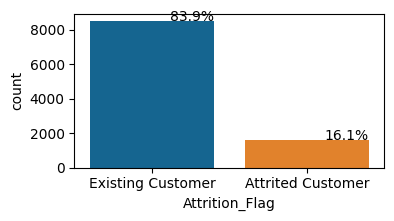

In [283]:
plt.figure(figsize=(4,2))
ax = sns.countplot(x=df['Attrition_Flag'])
total = len(df['Attrition_Flag'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

### <span style="color:red"> Target label is imbalanced. Need to consider balancing the data using either class weight or SMOTE </span>


<a id="4"></a>
<h1 style="background-color:orange;font-family:monospace;font-size:250%;text-align:center">6. EDA</h1>

We have a total of 19 features including 14 numerical and 5 categorical attributes

## 6.1 Univariate analysis

## <span style="color:purple">6.1.1 Numerical Data 

In [284]:
# 14 numerical columns
num_col = df.select_dtypes(['int64','float64']).columns.to_list()
num_col

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [285]:
df[num_col].describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


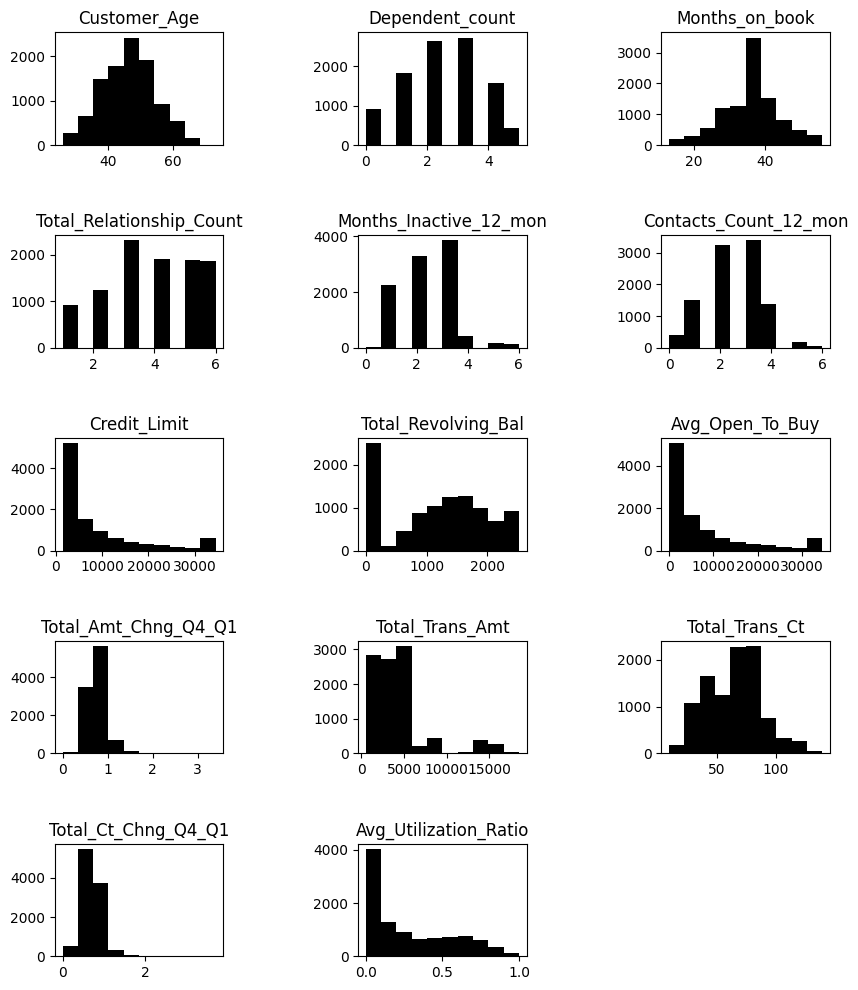

In [286]:
# check data distribution
fig = plt.figure(figsize=(10, 12))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for i,var in enumerate(num_col):
    ax = fig.add_subplot(5, 3, i+1)
    ax.hist(df[var], color='black')
    ax.set_title(var)

### <span style="color:red"> Data is not normal distributed in most columns  </span>

**we next analyze how those features correlate with churn rate**

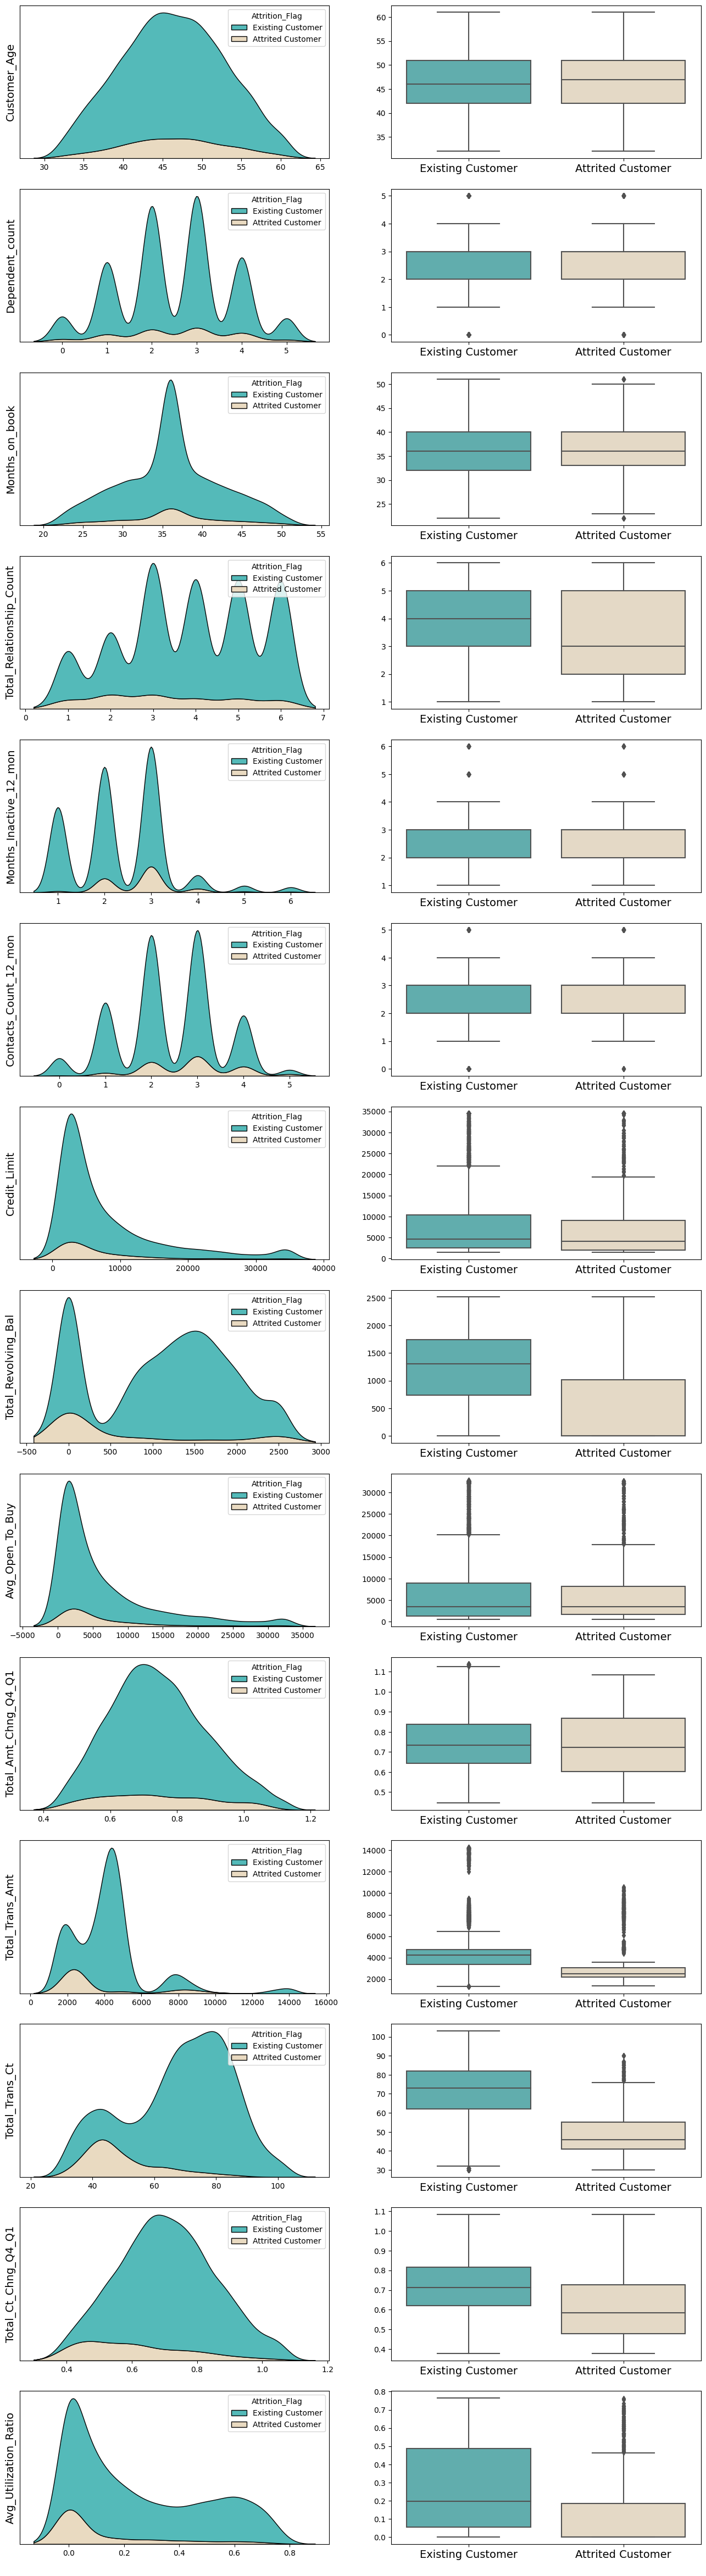

In [290]:
fig, ax = plt.subplots(ncols=2, nrows=14, figsize=(16, 60))                
i = 0 #counter
for cols in num_col:    
    # Removing Outliers     
    Q3 = df[cols].quantile(0.99)
    df = df[df[cols] <= Q3]
    Q1 = df[cols].quantile(0.01)
    df = df[df[cols] >= Q1]
    
    sns.kdeplot(df[cols], fill=True, alpha=1, hue = df['Attrition_Flag'], 
                palette=('#54BAB9', '#E9DAC1'), multiple='stack', ax=ax[i,0])
    
    sns.boxplot(data= df, y=cols, x='Attrition_Flag', ax=ax[i, 1],
               palette=('#54BAB9', '#E9DAC1'), color='white')
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    ax[i,0].tick_params(left=False, labelleft=False)
    ax[i,0].set_ylabel(cols, fontsize=14)
    i=i+1      
plt.show()

### <span style="color:red"> Features likely contribute to churn (data distribute differently between existing and churned customer:</span>
- Total_Relationship_Count
- Total_Revolving_Bal
- Total_Trans_Amt
- Total_Trans_Ct
- Avg_Utilization_Ratio
- Total_Amt_Chng_Q4_Q1
- Total_Ct_Chng_Q4_Q1

### <span style="color:green"> Features NOT likely contribute to churn (data distribute similarly between existing and churned customer:</span>
- Customer_Age
- Dependent_count
- Months_on_book
- Months_Inactive_12_mon
- Contacts_Count_12_mon
- Credit_Limit
- Avg_Open_To_Buy

## <span style="color:purple">6.1.2 Categorical Data 

In [291]:
cat_col = df.select_dtypes(['object']).columns.to_list()
cat_col.remove('Attrition_Flag')
cat_col

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

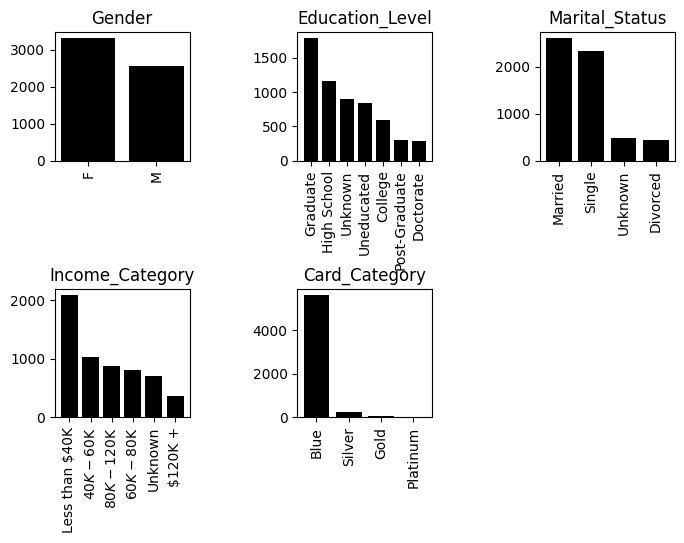

In [300]:
fig = plt.figure(figsize=(8, 5))
fig.subplots_adjust(hspace=1.0, wspace=0.8)
for i,var in enumerate(cat_col):
    tmp = df[var].value_counts().reset_index()
    ax = fig.add_subplot(2, 3, i+1)
    ax.bar(tmp['index'], tmp[var], color='black')
    ax.set_title(var)
    ax.tick_params(axis='x', labelrotation = 90)

In [ ]:
def countplot_churn(cats, data):
    fig, axes = plt.subplots(2, 3, figsize=(22, 16))
    axes = axes.flatten()
    fig.suptitle('Categorical Features Distributions by Churn',fontsize=30)
    
    for ax, cat in zip(axes, cats):
        if cat == 'Churn':
            sns.countplot(data[cat], palette='rocket', ax=ax)

        else:

            sns.countplot(x=cat,
                          data=data,
                          hue='Churn',
                          palette='rocket',
                          ax=ax)
            ax.legend(title='Churn',
                      loc='upper right',
                      labels=['No', 'Yes'])
            
        ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
        plt.ylabel('Count', fontsize=15, weight='bold')

In [304]:
fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(16, 28))                
i = 0 
for col in cat_col:    
    sns.countplot(data=df x=col, hue='Attrition_Flag',palette='rocket')
    #     ax[i].set_xlabel(' ')
#     ax[i].set_xlabel(' ')
#     ax[i].set_ylabel(' ')
#     ax[i].xaxis.set_tick_params(labelsize=14)
#     ax[i].tick_params(left=False, labelleft=False)
#     ax[i].set_ylabel(col, fontsize=16)    
#     #ax[i].bar_label(ax[i].containers[0], size="12")
#     ax[i].grid(False)
    i=i+1
         
plt.show()

SyntaxError: invalid syntax (1843623319.py, line 4)

# Multivariate analysis

<AxesSubplot: >

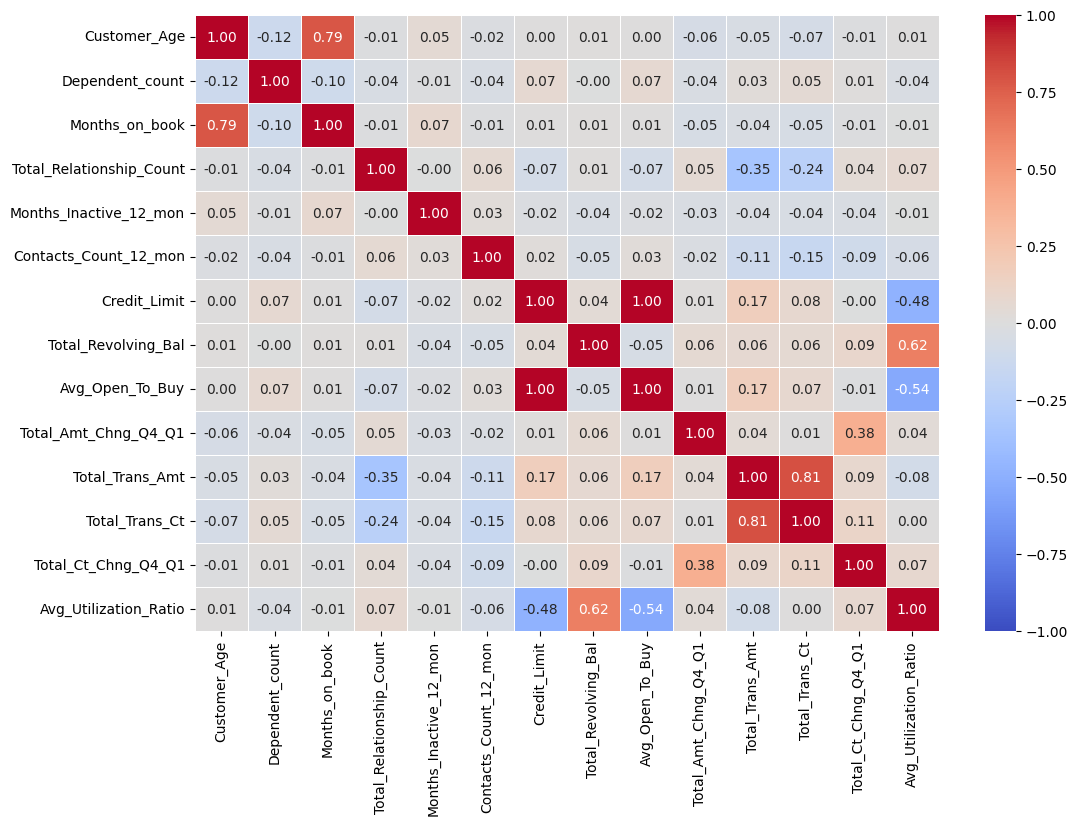

In [281]:
## Relationship between 2 variables
plt.figure(figsize=(12,8))
sns.heatmap(df[num_col].corr(), 
            vmin=-1.0, 
            vmax=1.0, 
            linewidths=0.5, 
            cmap='coolwarm', 
            annot=True, 
            fmt='.2f')

![title](img/numerical_data1.png)

### <span style="color:red"> Insights from above numerical features analysis:
- Total_Revolving_Bal = Credit_Limit - Avg_Open_To_Buy
- Avg_Utilization_Ratio = Total_Revolving_Bal  / credit limit
- Usually Total_Revolving_Bal is much smaller than Avg_Open_To_Buy. Thus Credit_Limit is close to Avg_Open_To_Buy in most columns. Correlation is 1.0 between them. We can drop Avg_Open_To_Buy column
- Customer_age correlates well with Months_On_Book (0.79)
- Total_Trans_Ct also well correlates with Total_Trans_Amt (0.81). This is also understandable. 
- Also correlates well are Total_Revolving_Bal and Ave_Utlization_Ratio

<a id="4"></a>
<h1 style="background-color:orange;font-family:monospace;font-size:250%;text-align:center">DATA PREPROCESSING</h1>

In [ ]:
df = df.drop('Avg_Open_To_Buy',axis=1)

In [232]:
# Defining the histogram plotting function for plotly
# histnorm='percent', barnorm='percent', text_auto=True
def px_hist(feature):
    group_df = df.groupby([feature,'Attrition_Flag']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df,x=feature,y='Count',color='Attrition_Flag',marginal='box',
                       title=f'Churn rate frequency to {feature} distribution', 
                       color_discrete_sequence=["red","green"], width=800, height=350,
                       nbins=20, text_auto=True)
    #pio.renderers.default = 'iframe'
    fig.show()

In [236]:
px_hist('Customer_Age')

### The distribution of customer ages in our dataset follows a fairly normal distribution. So is the chured customers. There is slightly higher churn rate for customer age 40 to 50.

In [237]:
px_hist('Dependent_count')

### The distribution of Dependent_count in our dataset also follows a fairly normal distribution. So is the chured customers. 

### <span style="color:red"> Next check four Bank relationship columns: 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon'</span>

In [248]:
px_hist('Months_on_book')

### The distribution of Months_on_book in our dataset also follows a fairly normal distribution.  The feature correlates strongly with Customer_Age (0.79). 

In [251]:
px_hist('Months_Inactive_12_mon')

In [252]:
px_hist('Contacts_Count_12_mon')

In [213]:
# Defining bar chart function using plotly
def px_bar(feature, df=df):
    #Groupby the categorical feature
    temp_df = df.groupby([feature, 'Attrition_Flag']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str
    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    #Setting graph framework
    
    fig = px.bar(temp_df, x=feature, y='Count', color='Attrition_Flag', title=f'Churn rate by {feature}', barmode="group", 
                 color_discrete_sequence=["green", "red"], width=800, height=350)
    return fig.show()

In [214]:
px_bar('Customer_Age')

Normal distribution for both churner and non-churner. We may want to bin the data for better model explainability and business strategy design

* Binning : Customer_Age, Months_on_book, Credit_Limit, Total_Revolving_Bal, <br>Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, <br>Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio
* Weight of Evidence


In [ ]:
# Customer_Age : <20, 20-30, 30-40, 40-50, 50-60, >60
converter = lambda x: '<30' if (x <= 30) else \
                        ('30-40' if (x > 30 and x <= 40) else \
                        ('40-50' if (x > 40 and x <= 50) else \
                        ('50-60' if (x > 50 and x <= 60) else \
                        '>60')))

tmp = df['Customer_Age'].apply(converter)
df['Customer_Age_Binning'] = tmp

tmp2 = df.groupby('Customer_Age_Binning')['Attrition_Flag'].value_counts()
tmp2 = pd.DataFrame(tmp2)
tmp2 = tmp2.rename(columns={'Attrition_Flag':'Counts'})
tmp2 = tmp2.reset_index()
tmp2['Customer_Age_Binning'] = pd.Categorical(tmp2['Customer_Age_Binning'], 
                                              categories=['<30','30-40','40-50','50-60','>60'], 
                                              ordered=True)
fig_age_bin = ggplot(tmp2) +\
                geom_col(aes(x='Customer_Age_Binning', y='Counts', fill='Attrition_Flag'))
fig_age_bin